В первой части будет выполнена приоритизация гипотез по фреймворкам ICE и RICE.
<br>Во второй части будет выполнен анализ a/b теста.

### Часть 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
hyp=pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hyp.columns=[x.lower() for x in hyp.columns]

In [5]:
hyp['ICE']=hyp['impact']*hyp['confidence']/hyp['efforts']

In [6]:
hyp['RICE']=hyp['reach']*hyp['impact']*hyp['confidence']/hyp['efforts']

In [7]:
pd.options.display.max_colwidth = 200

In [8]:
hyp.sort_values(by=['ICE'],ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


<font color='blue'> ICE стоило отформатировать до 1-2 знаков после запятой. </font>

In [9]:
hyp.sort_values(by=['RICE'],ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


При изменении фреймворка с ICE на RICE на первые два места вышли гипотезы с наибольшим обхватом, однако 3 из 4 самых приоритетных также остались в четверке. Это говорит о возможности использовать оба фреймворка для приоритизации гипотез.


### Часть 2. Анализ A/B-теста

In [10]:
orders=pd.read_csv('/datasets/orders.csv')
visits=pd.read_csv('/datasets/visitors.csv')

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64

In [14]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

In [17]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
cummulativeData = pd.merge(ordersAggregated,visitorsAggregated,right_on=['date','group'],left_on=['date','group'])

In [20]:
cummulativeData

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [21]:
cummulativeData['date']=pd.to_datetime(cummulativeData['date'])

In [22]:
cummulativeData.columns=['date','group','orders','buyers','revenue','visitors']

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


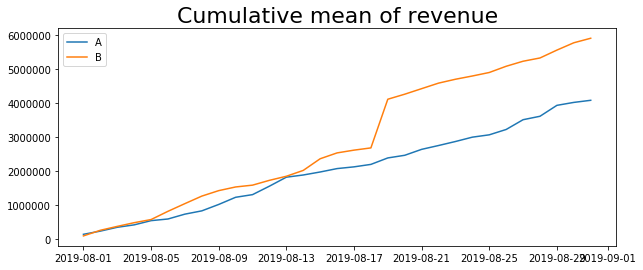

In [23]:
plt.figure(figsize=(10,4))
plt.title('Cumulative mean of revenue',fontsize=22)
plt.plot(cummulativeData.query('group=="A"')['date'],cummulativeData.query('group=="A"')['revenue'],label='A')
plt.plot(cummulativeData.query('group=="B"')['date'],cummulativeData.query('group=="B"')['revenue'],label='B')
plt.legend()

Первое время групы шли почти одинаково, однако в районе 17 августа произошел резкий рост выручки в группе B и в дальнейшем он продолжился.


#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Text(0.5, 0, 'date')

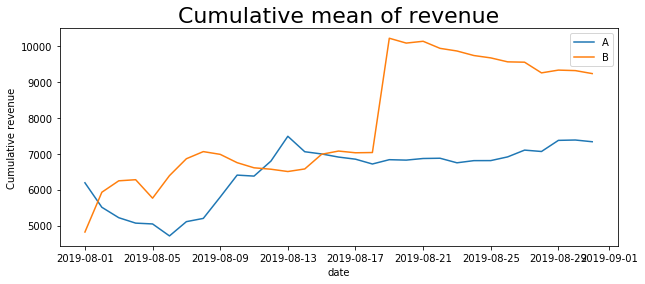

In [24]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeData.query('group=="A"')['date'],cummulativeData.query('group=="A"')['revenue']/cummulativeData.query('group=="A"')['orders'],label='A')
plt.plot(cummulativeData.query('group=="B"')['date'],cummulativeData.query('group=="B"')['revenue']/cummulativeData.query('group=="B"')['orders'],label='B')
plt.legend()
plt.title('Cumulative mean of revenue',fontsize=22)
plt.ylabel('Cumulative revenue')
plt.xlabel('date')

Группа А была незначительно ниже по среднему чеку почти все время.<br>Наблюдается выброс в районе 17-го августа и дальнейшяя тенденция группы B к снижению среднего чека.



#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Text(0.5, 0, 'date')

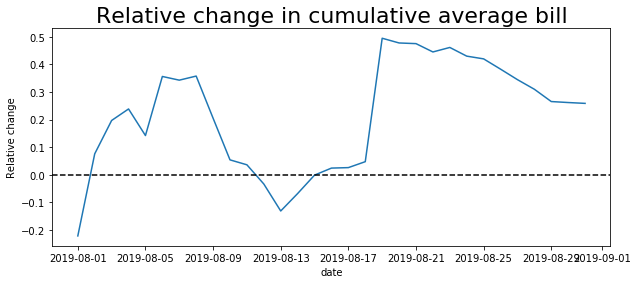

In [25]:
plt.figure(figsize=(10,4))
mergedCummulativeRevenue = cummulativeData.query('group=="A"')[['date','revenue','orders']].merge(cummulativeData.query('group=="B"')[['date','revenue','orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative change in cumulative average bill',fontsize=22)
plt.ylabel('Relative change')
plt.xlabel('date')

Средний чек группы B на 30% больше практически на протяжении всего периода наблюдения.

<br>Все три графика демонстрируют одинаковую картину.

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [26]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

Text(0.5, 0, 'date')

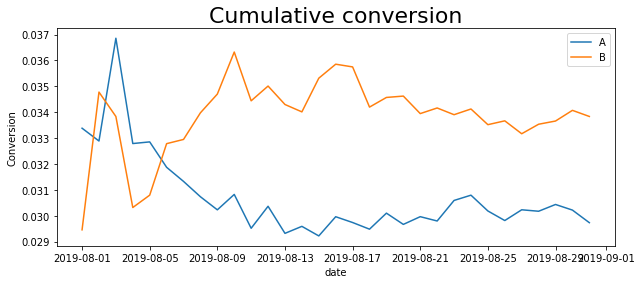

In [27]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeData.query('group=="A"')['date'], cummulativeData.query('group=="A"')['conversion'], label='A')
plt.plot(cummulativeData.query('group=="B"')['date'], cummulativeData.query('group=="B"')['conversion'], label='B')
plt.legend()
plt.title('Cumulative conversion',fontsize=22)
plt.ylabel('Conversion')
plt.xlabel('date')

Конверсия группы B больше почти на протяжении всего периода наблюдения. Однако разница не такая большая - максимальное значение около - 0.005.


#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [28]:
mergedCummulativeConversions = cummulativeData.query('group=="A"')[['date','conversion']].merge(cummulativeData.query('group=="B"')[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

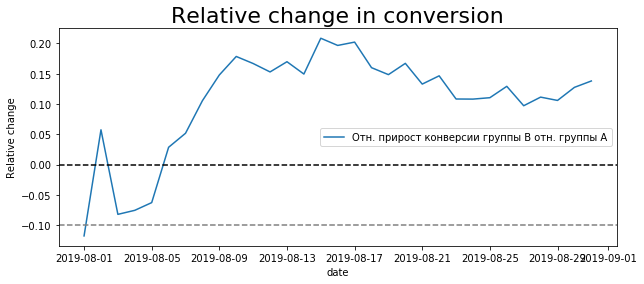

In [29]:
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Отн. прирост конверсии группы B отн. группы A")
plt.legend()
plt.title('Relative change in conversion',fontsize=22)
plt.ylabel('Relative change')
plt.xlabel('date')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

Наблюдается почти 20% преимущество группы B.


#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [30]:
order_by_user=orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})

In [31]:
order_by_user.columns=['user_id','orders']

In [32]:
order_by_user

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


Text(0.5, 0, 'Users')

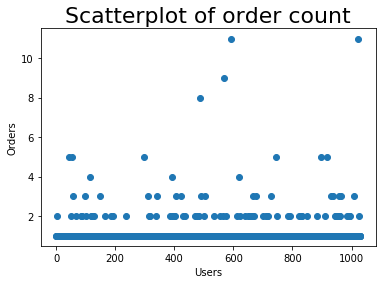

In [33]:
x_values = pd.Series(range(0,len(order_by_user)))

plt.scatter(x_values, order_by_user['orders'])
plt.title('Scatterplot of order count',fontsize=22)
plt.ylabel('Orders')
plt.xlabel('Users')


Больше трех заказов почти никто не совершает, посчитаем перцентили.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [34]:
np.percentile(order_by_user['orders'], [95, 99])

array([2., 4.])

95% пользователей не совершают больше двух заказов, 99% - больше четырех.

За границу для определения аномальных пользователей, судя по графику и перцентилям, выбираем 4 заказа.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [35]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Text(0.5, 0, 'Users')

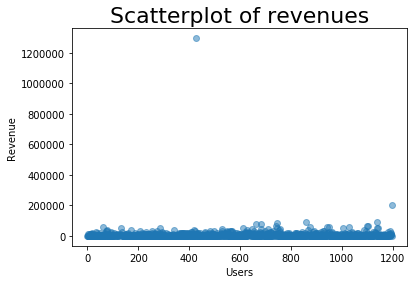

In [36]:
x_val=pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_val,orders['revenue'],alpha=0.5)
plt.title('Scatterplot of revenues',fontsize=22)
plt.ylabel('Revenue')
plt.xlabel('Users')

Видим два выброса - на 1.2 млн и чуть выше 200000 - посмотрим на график без них.


Text(0.5, 0, 'Users')

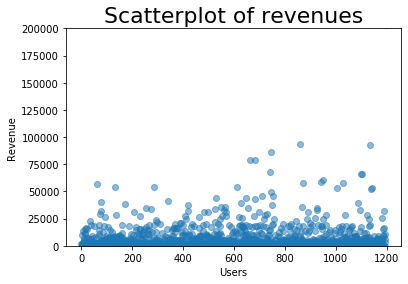

In [37]:
plt.scatter(x_val,orders['revenue'],alpha=0.5)
plt.ylim(0,200000)
plt.title('Scatterplot of revenues',fontsize=22)
plt.ylabel('Revenue')
plt.xlabel('Users')

Большая часть пользователей совершает заказы в пределах 25000, еще небольшая часть - в пределах 50000, все что выше - крайне редко.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

За границу выбираем 99 перцентиль или 58233.2.


#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Проверим гипотезу о наличии различий в конверсии между групами.
<br>H0: Статистически значимой разницы нет
<br>H1: Статистически значимая разница есть

In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [40]:
visitorspergroupA=visits.query('group=="A"').visitors.sum()
visitorspergroupB=visits.query('group=="B"').visitors.sum()

In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorspergroupA - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorspergroupB - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [42]:
alpha = .05

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")\

print("Относительная разница {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница 0.138


#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Проверим гипотезу о наличии различий в среднем чеке между групами.
<br>H0: Статистически значимой разницы нет
<br>H1: Статистически значимая разница есть

In [43]:
alpha = .05

results = st.mannwhitneyu(orders.query('group=="A"')['revenue'], orders.query('group=="B"')['revenue'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")
    
print("Относительная разница {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница 0.259


#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [44]:
many_orders=order_by_user.query('orders>4')['user_id']

In [45]:
big_orders=orders.query('revenue>58233.2')['visitorId']

In [46]:
abnormalUsers = pd.concat([many_orders, big_orders], axis = 0).drop_duplicates()


In [47]:
abnormalUsers.head()

44      199603092
55      237748145
299    1230306981
487    2038680547
569    2378935119
dtype: int64

In [48]:
abnormalUsers.shape

(21,)

In [49]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitorspergroupA - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitorspergroupB - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Проверим гипотезу о наличии различий в конверсии между групами.
<br>H0: Статистически значимой разницы нет
<br>H1: Статистически значимая разница есть

In [50]:
alpha = .05

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")
    
print("Относительная разница {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.006899620351026831
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница 0.154


#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проверим гипотезу о наличии различий в среднем чеке между групами.
<br>H0: Статистически значимой разницы нет
<br>H1: Статистически значимая разница есть

In [51]:
alpha = .05
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительная разница {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-значение:  0.4787629773071914
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница -0.014


#### Примите решение по результатам теста и объясните его. 

Мы принимаем решение остановить тест и зафиксировать победу группы B:
<br>1)на графиках группа B лучше себя показывает
<br>2)Есть статистическая значимость в различии конверсий в пользу группы B<br><br>

Аргумент против только один - средний чек у группы B на 1% меньше, однако статистической значимости у этого факта нет.


### Общий вывод

В ходе проекта был проанализирован A/B тест, были построены графики конверсии и среднего чека. Также были выявлены и удалены выбросы.<br>Была проверена статистическая значимость и зафиксирована победа группы B.
